# Обработка изображений

In [1]:
%matplotlib inline

In [2]:
import cv2
from matplotlib import pyplot as plt

In [3]:
%pwd

'/Users/andrew/learn-opencv'

In [4]:
%ls

OpenCV_CheatSheet.md  images/
README.md             theory.ipynb


## Чтение и запись изображений

Считываем трёхканальное (`RBB`) изображение:

In [5]:
img = cv2.imread('images/valle_1.jpeg')
print(f'Image shape:{img.shape}')

Image shape:(1024, 1024, 3)


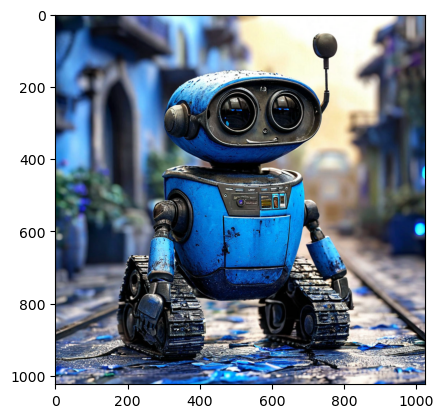

In [6]:
plt.imshow(img)
plt.show()

Считываем `RGB` изображение и сразу переводим его в оттенки серого – `GRAYSCALE` формат. Уменьшим размер картинки до `512x512`:

In [7]:
img = cv2.imread('images/valle_1.jpeg', cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, (512,512))
print(f'Image shape:{img.shape}')

Image shape:(512, 512)


Считываем изображение, затем переводим его в оттенки серого:

In [8]:
img = cv2.imread('images/valle_1.jpeg')
grayscale = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
print(f'Image shape:{grayscale.shape}')

Image shape:(1024, 1024)


Отобразим картинку:

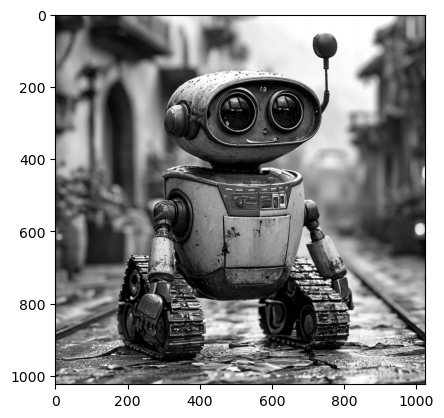

In [9]:
plt.imshow(grayscale, cmap='gray')
plt.show()

Сохраняем картику:

In [18]:
cv2.imwrite('images/valle_grayscale.jpeg', grayscale)

True

Хотим перекрасить определённую область картинки в красный цвет:

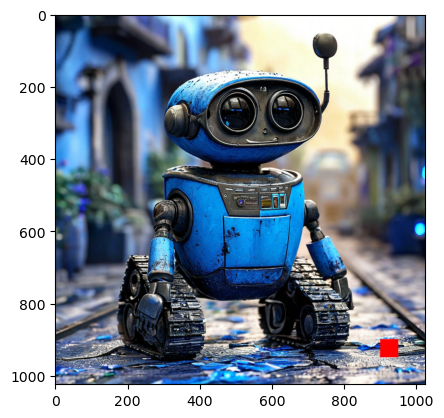

In [17]:
# Задаём область, которую хотим перекрасить 
y1, y2, x1, x2 = 900, 950, 900, 950
# Задаём цвет, в который хотим перекрасить
new_color = (255,0, 0)
img[y1:y2, x1:x2] = new_color
plt.imshow(img)
plt.show()

## Размытие изображений

Считываем картинку. Делаем размытие фильтром Гауссом с размером ядра `27x27`. Величина **0** у стандартного отклонения подразумевает автоматическое вычисление по умолчанию:

In [12]:
img = cv2.imread('images/valle_1.jpeg')
blurred = cv2.GaussianBlur(img, (27,27), 0)
cv2.imwrite('images/valle_blurred.jpg',blurred)

True

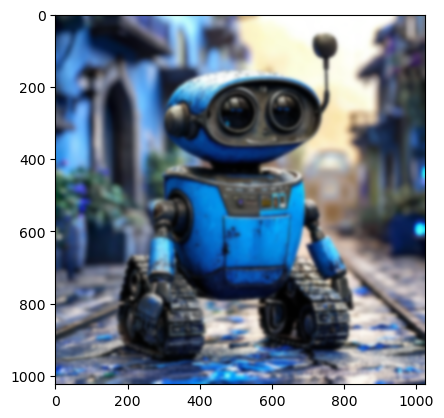

In [13]:
plt.imshow(blurred)
plt.show()

## Пороговая фильтрация

Пороговую фильтрацию можно задать следующим условием: 

$$ 
dst(x, y) =
\begin{cases} 
\text{maxVal}, & \text{если } src(x, y) \geq T \\ 
0, & \text{если } src(x, y) < T 
\end{cases}
$$
где `T` — порог,  `maxVal` — значение для белого цвета.


1. Сначала переводим изображение к одноканальному. 

2. Выбираем пороговое значение `T` и максимальное значение `maxValue`. В нашем случае `T=125`, `maxValue=255`

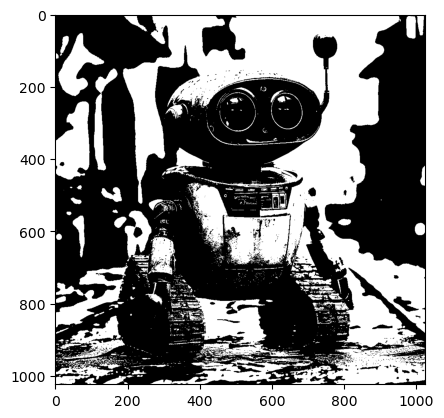

In [14]:
_, thresholded = cv2.threshold(grayscale, 125, 255, cv2.THRESH_BINARY)
cv2.imwrite('images/thresholded_valle.jpeg', thresholded)
plt.imshow(thresholded, cmap='gray')
plt.show()

Кроме того, существуют и другие типы пороговой фильтрации. Функция `cv2.threshold` предоставляет несколько вариантов пороговой фильтрации:

1. **Бинарная фильтрация (`cv2.THRESH_BINARY`)**:
    Если значение пикселя выше порога \( T \), оно становится `maxVal`, иначе — 0.

2. **Обратная бинарная фильтрация (`cv2.THRESH_BINARY_INV`)**:
    Противоположная бинарной: пиксели выше порога становятся 0, ниже — `maxVal`.

3. **Транкация (`cv2.THRESH_TRUNC`)**:
    Значения пикселей выше порога обрезаются до \( T \), остальные остаются неизменными.

4. **Порог до нуля (`cv2.THRESH_TOZERO`)**:
    Значения пикселей ниже порога становятся 0, остальные остаются неизменными.

5. **Обратный порог до нуля (`cv2.THRESH_TOZERO_INV`)**:
    Значения пикселей выше порога становятся 0, остальные остаются неизменными.

## Нахождение границ с помощью алгоритма Canny

Устанавливаем два значения порога `threshold1` и `threshold2` для градиентов интесивности пикселей:

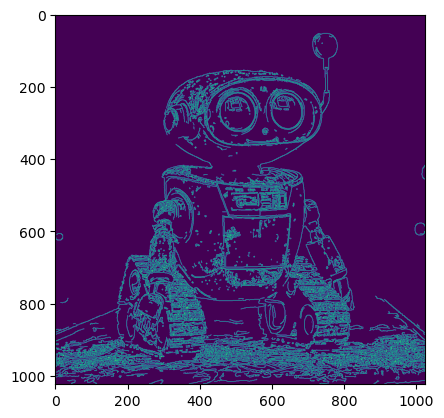

In [15]:
grayscale = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Применение Canny
edges = cv2.Canny(grayscale, threshold1=100, threshold2=200)

cv2.imwrite('images/edged_valle.jpg', edges)
plt.imshow(edges)
plt.show()

## Нахождение контуров

### Основные этапы нахождения контуров:
1. Подготовка изображения
   - для обнаружения контуров требуется бинарное изображение
   - обычно используется метод пороговой фильтрации или алгоритм Canny для предварительной обработки

   `_, binary = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)`
2. Нахождение контуров
   - Функция cv2.findContours анализирует бинарное изображение и выделяет его контуры.
   - Основной синтаксис:
   `contours, hierarchy = cv2.findContours(image, mode, method)`
        - **image** - подаваемое на вход изображение
        - **mode** - способ организации контуров
        - **method** - алгоритм аппроксимации контуров

### Параметры функции cv2.findContours

1. Режимы поиска конутров(mode)
- **cv2.RETR_EXTERNAL**: Извлекает только внешние контуры.
- **cv2.RETR_LIST**: Извлекает все контуры без организации иерархии.
- **cv2.RETR_TREE**: Извлекает все контуры с полным построением иерархии.
- **cv2.RETR_CCOMP**: Извлекает контуры в виде двухуровневой иерархии.

2. Методы аппроксимации 
- **cv2.CHAIN_APPROX_NONE**: Сохраняет все точки контура.
- **cv2.CHAIN_APPROX_SIMPLE**: Упрощает контур, сохраняя только крайние точки.

### Выходное значение
- `Contours`: Список всех обнаруженных контуров, где каждый контур представлен массивом координат точек.
- `Hierarchy`: Информация об иерархии контуров. Полезно для анализа вложенных объектов.

### Рисование контуров
Для отображения найденных контуров используется функция `cv2.drawContours`:

`cv2.drawContours(image, contours, contourIdx, color, thickness)`

- `image`: Изображение, на котором рисуются контуры.
- `contours`: Найденные контуры
- `contourIdx`: Индекс конкретного контура для отображения (или -1 для всех контуров)
- `color`: Цвет линий
- `thickness`: Толщина линий


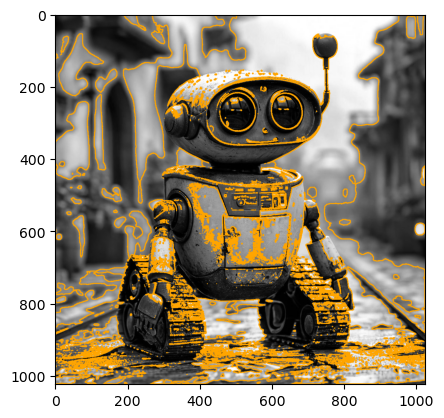

In [42]:
# Загрузка изображения в градациях серого
image = cv2.imread('images/valle_1.jpeg', cv2.IMREAD_GRAYSCALE)

# Применение пороговой обработки
_, binary = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

# Нахождение контуров
contours, hierarchy = cv2.findContours(binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Рисование контуров
output = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)  # Перевод в цветное для отображения
cv2.drawContours(output, contours, -1, (255, 165, 0), 2)

cv2.imwrite('images/valle_contours.jpg', output)
plt.imshow(output)
plt.show()

In [67]:
print(f'Всего на картинке {len(contours)} контура')
print(f'Можем также обратиться к отдельному контуру изображения по индексу: contours[idx]')
print(f'Размер 6-контура: {contours[5].shape}')

Всего на картинке 3084 контура
Можем также обратиться к отдельному контуру изображения по индексу: contours[idx]
Размер 6-контура: (40, 1, 2)


Также есть приложу пару полезных функций для работы с контурами: 

1. **Площадь контуров**:

`area = cv2.contourArea(contour)`

2. **Пеример контуров**:

`perimeter = cv2.arcLength(contour, closed=True)`

3. **Прямоугольник вокруг контура**:

`x, y, w, h = cv2.boundingRect(contour)`

4. **Огибающий круг**:

`(x, y), radius = cv2.minEnclosingCircle(contour)`


In [70]:
idx = 5
print(f'Площадь {idx-1}-ого контура: {cv2.contourArea(contours[idx])}')
print(f'Периметр {idx-1}-ого контура: {cv2.arcLength(contours[idx], closed=True) }')
print(f'Прямоугольник вокруг {idx-1}-ого контура: {cv2.boundingRect(contours[idx])}')
print(f'Огибающий круг {idx-1}-ого контура: {cv2.minEnclosingCircle(contours[idx])}')

Площадь 4-ого контура: 422.5
Периметр 4-ого контура: 138.5269113779068
Прямоугольник вокруг 4-ого контура: (264, 1012, 59, 12)
Огибающий круг 4-ого контура: ((293.0, 1019.5), 29.210542678833008)
